# EDA

# 0 Import of libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1 Dataset import

In [2]:
url = "https://drive.google.com/uc?id=1dTauyYXM4FfCyeFgc6jAS9XtkjTdfsVt"

df = pd.read_csv(url)

print(df.head())

             Timestamp  Reactor_Temperature  Regenerator_Temperature  \
0  2025-01-01 00:00:00               536.13                   650.96   
1  2025-01-01 00:05:00               548.61                   743.60   
2  2025-01-01 00:10:00               558.24                   694.41   
3  2025-01-01 00:15:00               521.42                   707.24   
4  2025-01-01 00:20:00               554.45                   731.65   

   Reactor_Pressure  Feed_Flow_Rate  Catalyst_to_Oil_Ratio  Catalyst_Activity  \
0            169.93           84.85                   5.31              92.56   
1            162.86           95.56                   5.81              73.81   
2            199.85           55.34                   4.42              87.44   
3            155.62           71.16                   5.55              74.76   
4            223.78          101.43                   5.21              83.96   

   Air_Flow_Rate  Fractionator_Top_Temp  Fractionator_Bottom_Temp  ...  \
0     

In [3]:
print(f"Total number of rows: {len(df.index)}")
df.describe(include="all")

Total number of rows: 1300


,Timestamp,Reactor_Temperature,Regenerator_Temperature,Reactor_Pressure,Feed_Flow_Rate,Catalyst_to_Oil_Ratio,Catalyst_Activity,Air_Flow_Rate,Fractionator_Top_Temp,Fractionator_Bottom_Temp,...,Product_Yield,Conversion_Rate,Energy_Consumption,Emissions_NOx,Emissions_SOx,Control_Stability_Index,Reward_Score,Feed_Change_Event,Catalyst_Replacement,External_Disturbance_Type
count,1300,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.0000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,179
unique,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2025-01-05 12:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AirFlowFluctuation
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119
mean,NaN,520.510100,699.532977,200.553015,84.025392,5.991162,79.913246,65258.142446,175.644785,330.0192,...,49.751854,80.213031,150.502877,100.951138,35.289308,0.901092,0.370609,0.095385,0.043077,NaN
std,NaN,23.369177,28.990121,28.995807,19.792733,1.147160,11.554706,8520.480908,14.347916,17.6485,...,5.667837,5.739969,29.065612,29.967522,14.437791,0.058101,0.044152,0.293858,0.203108,NaN
min,NaN,480.060000,650.010000,150.110000,50.130000,4.000000,60.030000,50022.530000,150.160000,300.0600,...,40.020000,70.000000,100.180000,50.080000,10.060000,0.800000,0.247000,0.000000,0.000000,NaN
25%,NaN,501.237500,674.627500,175.600000,67.152500,5.000000,69.932500,57962.610000,163.497500,314.4875,...,44.887500,75.340000,125.137500,75.410000,22.992500,0.850000,0.340000,0.000000,0.000000,NaN
50%,NaN,520.740000,697.885000,201.130000,84.450000,5.960000,80.015000,65648.680000,175.615000,330.3000,...,49.540000,80.445000,150.065000,100.900000,35.190000,0.900000,0.371000,0.000000,0.000000,NaN
75%,NaN,541.877500,723.490000,225.982500,100.080000,6.990000,89.890000,72486.967500,187.870000,346.0125,...,54.515000,85.130000,175.740000,127.915000,47.832500,0.950000,0.401250,0.000000,0.000000,NaN


As we can see, the dataset doesn't have any missing values except for the external disturbance type.

At the first glance, all statistical data is normal. STD values are reasonably low and there's no much difference between minimum and maximum values.

All timestamps are unique.

Changing special event columns into the bool type:

In [4]:
print(df.dtypes)

df["Feed_Change_Event"] = df["Feed_Change_Event"].astype(bool)
df["Catalyst_Replacement"] = df["Catalyst_Replacement"].astype(bool)

print(df.dtypes)

Timestamp                     object
Reactor_Temperature          float64
Regenerator_Temperature      float64
Reactor_Pressure             float64
Feed_Flow_Rate               float64
Catalyst_to_Oil_Ratio        float64
Catalyst_Activity            float64
Air_Flow_Rate                float64
Fractionator_Top_Temp        float64
Fractionator_Bottom_Temp     float64
Feedstock_Quality_Index      float64
Setpoint_Reactor_Temp        float64
Setpoint_Regenerator_Temp    float64
PID_Kp                       float64
PID_Ki                       float64
PID_Kd                       float64
Fuzzy_Adjustment_Factor      float64
Product_Yield                float64
Conversion_Rate              float64
Energy_Consumption           float64
Emissions_NOx                float64
Emissions_SOx                float64
Control_Stability_Index      float64
Reward_Score                 float64
Feed_Change_Event              int64
Catalyst_Replacement           int64
External_Disturbance_Type     object
d

# 2 Duplicates

In [5]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
display(duplicates)

Number of duplicate rows: 0


,Timestamp,Reactor_Temperature,Regenerator_Temperature,Reactor_Pressure,Feed_Flow_Rate,Catalyst_to_Oil_Ratio,Catalyst_Activity,Air_Flow_Rate,Fractionator_Top_Temp,Fractionator_Bottom_Temp,...,Product_Yield,Conversion_Rate,Energy_Consumption,Emissions_NOx,Emissions_SOx,Control_Stability_Index,Reward_Score,Feed_Change_Event,Catalyst_Replacement,External_Disturbance_Type


There are no duplicates in the data.

# 3 Missing values

As has been mentioned already, the only column with missing values is "External_Disturbance_Type".

Missing values in that column mean that there's no external disturbance. Let's replace them with the "None" string (not None object!).

In [6]:
df["External_Disturbance_Type"] = df["External_Disturbance_Type"].fillna("None")

df["External_Disturbance_Type"].describe()

,External_Disturbance_Type
count,1300
unique,3
top,None
freq,1121


# 4 Correlation analysis

The Spearman correlation is used because it's better for non-linear relationships than the Pearson correlation.

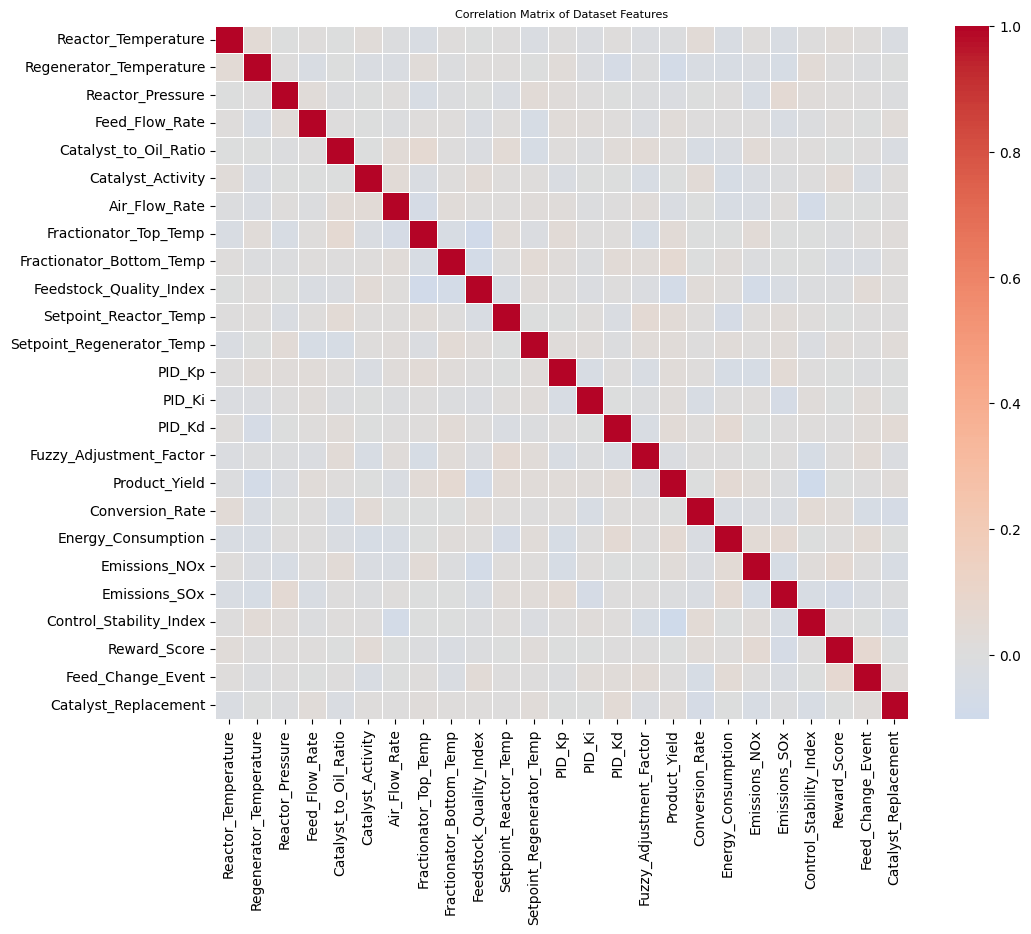

In [7]:
corr_matrix = df.corr(method="spearman", numeric_only=True)
plt.figure(figsize=(12, 9))

sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    fmt=".2f",
    center=0,
    linewidths=0.5,
    square=True,
)

plt.title("Correlation Matrix of Dataset Features", fontsize=8)
plt.show()

There's no easy-to-catch correlation for any pair of dataset features.

In [8]:
px.scatter_matrix(
    df,
    dimensions=[
        "Conversion_Rate",
        "Reactor_Temperature",
        "Reactor_Pressure",
        "Regenerator_Temperature",
    ],
)

As we can see from the scatter plots, the same value of conversion rate may correspond to many combinations of reactor parameters, which means that relations between the features of the dataset are complex.

In [9]:
px.scatter_matrix(
    df,
    dimensions=[
        "Energy_Consumption",
        "Reactor_Temperature",
        "Reactor_Pressure",
        "Regenerator_Temperature",
    ],
)

The same can be seen for energy consumption.

In [10]:
px.scatter_matrix(df, dimensions=["Energy_Consumption", "Conversion_Rate"])

There's no remotely linear relation between the conversion rate (how much of the raw oil gets converted) and the energy consumption score (how many energy the whole unit consumes). There's a lot of space to explore possible parameters to get the best ratio of these two features.

# 5 Outliers

As was mentioned earlier, no anomalies can be discerned in the data.

Check for the possible outliers can be done using box plots:

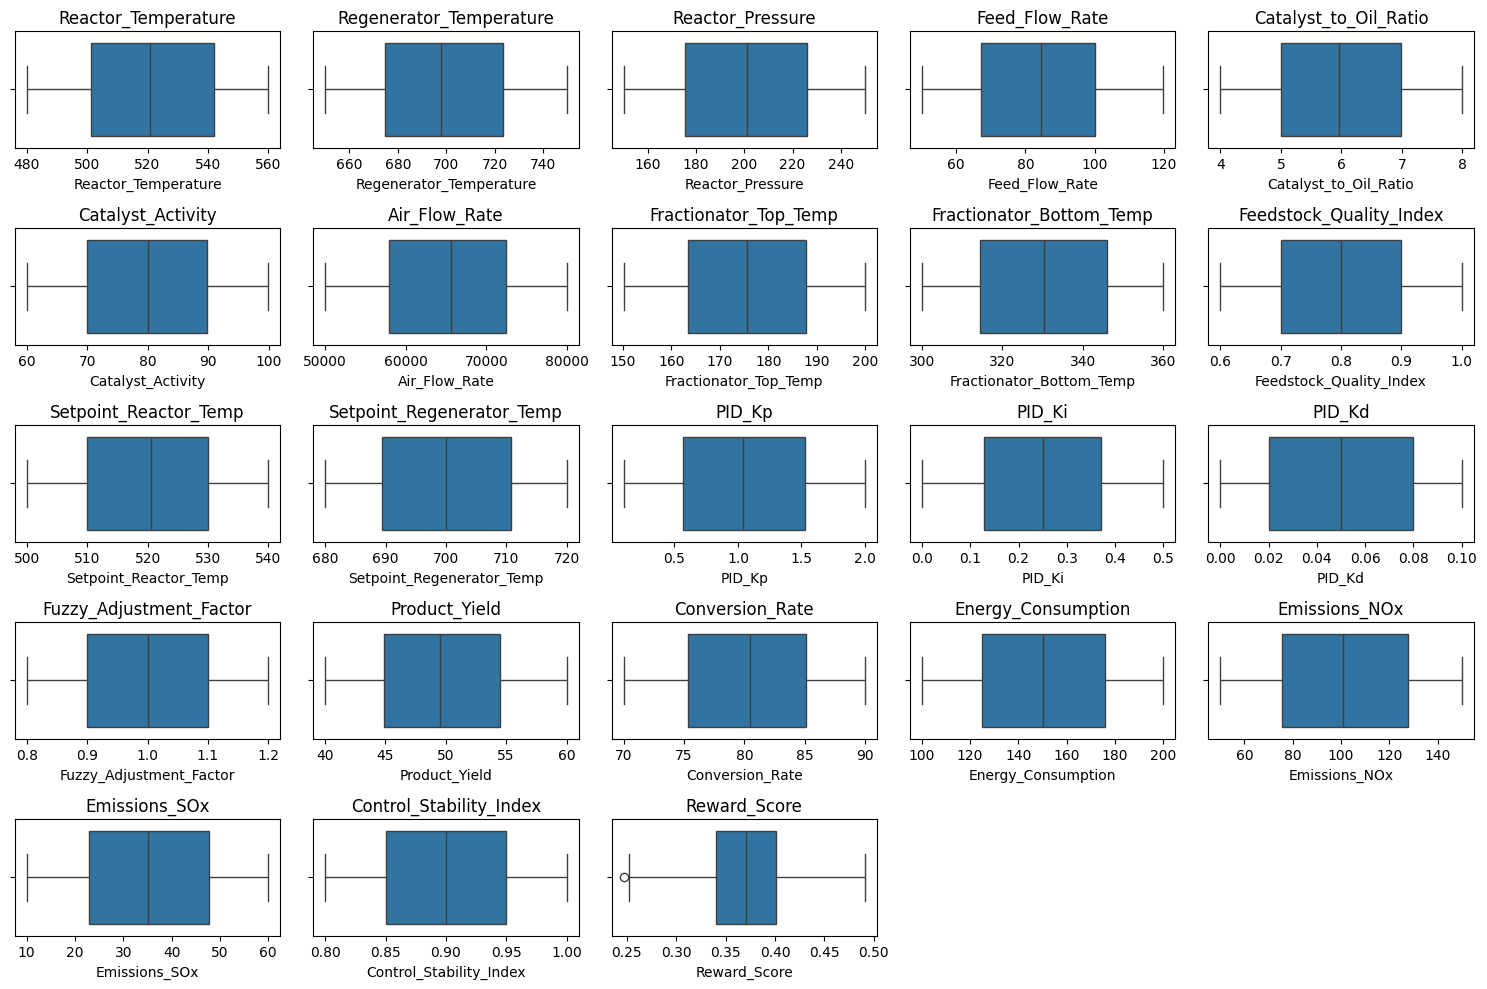

In [11]:
numeric_cols = df.select_dtypes(include=["number"]).columns


plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The only visible outlier is a single point for the Reward_Score column which is irrelevant since reward score is a parameter of the PID controller.

# 6 EDA metrics

These metrics have been discussed already but here's the formal check of the completeness score and uniqueness:

In [12]:
completeness = df.isnull().sum().sum() / (df.shape[0] * df.shape[1])
completeness_score = (1 - completeness) * 100

key_columns = ["Timestamp"]
uniqueness_scores_keys = df[key_columns].nunique() / len(df)
overall_uniqueness_score_keys = uniqueness_scores_keys.mean() * 100

print(f"Completeness Score: {completeness_score:.2f}%")
print(f"Overall Uniqueness Score for key columns: {overall_uniqueness_score_keys:.2f}%")

Completeness Score: 100.00%
Overall Uniqueness Score for key columns: 100.00%


Reaching the recommended values for these scores didn't bring any problems since the dataset barely required any cleaning,

# Conslusion

EDA shows that the dataset is practically complete and lacks any duplicates; all missing values are limited to a single column and can be easily replaced. No pairwise correlation found between any features. No outliers detected.